# Deep Q-Learning algorithm

In [1]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import abc
import tensorflow as tf
import numpy as np

from tf_agents.environments import py_environment
from tf_agents.environments import tf_environment
from tf_agents.environments import tf_py_environment
from tf_agents.environments import utils
from tf_agents.specs import array_spec, tensor_spec
from tf_agents.environments import wrappers
from tf_agents.trajectories import time_step as ts
from tf_agents.trajectories import policy_step as ps
from tf_agents.typing import types
from tf_agents.policies import random_py_policy
from tf_agents.policies import epsilon_greedy_policy
from tf_agents.policies import random_tf_policy
from tf_agents.policies import py_policy
from tf_agents.metrics import py_metrics
from tf_agents.metrics import tf_metrics
from tf_agents.drivers import py_driver
from tf_agents.drivers import tf_driver
from tf_agents.drivers import dynamic_episode_driver
from tf_agents.replay_buffers import tf_uniform_replay_buffer
from tf_agents.drivers import dynamic_step_driver
from tf_agents.policies import py_tf_eager_policy

import matplotlib.pyplot as plt
import qutip
from qutip import Bloch, QobjEvo, basis, sesolve, sigmay, sigmaz, sigmax, expect

import random

import sys
sys.path.append('../')
from temporal_difference.TD_algorithms import Ddqn

%matplotlib inline

2023-12-01 22:25:42.222175: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 22:25:42.249003: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-12-01 22:25:42.249677: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-01 22:25:42.876334: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


* System parameters

In [2]:
T = 10 # terminal time step
max_steps = 30 # number of time steps

* Create training and evaluation environments and define actions

In [3]:
# validate environment
from environments.qubit_env import QubitEnv

# define actions
# TODO: actions can be continuous within a range of course 
# actions will be the change in the magnetic field
max_Ω = 1

nb_actions = 9
zero_action = np.array(0, dtype = np.float32) # action 0
plus_action = np.array(max_Ω, dtype = np.float32) # action 1
minus_action = np.array(-max_Ω, dtype = np.float32) # action 2
half_plus_action = np.array(max_Ω / 2, dtype = np.float32) # action 3
half_minus_action = np.array(-max_Ω / 2, dtype = np.float32) # action 5
quarter_plus_action = np.array(max_Ω / 4, dtype = np.float32) # action 6
quarter_minus_action = np.array(-max_Ω / 4, dtype = np.float32) # action 7
plus2_action = np.array(2 * max_Ω, dtype = np.float32) # action 8
minus2_action = np.array(-2 * max_Ω, dtype = np.float32) # action 9

actions = [quarter_plus_action, quarter_minus_action, half_plus_action, half_minus_action, zero_action, plus_action, minus_action, plus2_action, minus2_action]

# shuffle them randomly to avoid bias
random.shuffle(actions)

omegas = [-max_Ω, -max_Ω / 4, -max_Ω / 2, 0, max_Ω / 2, max_Ω / 4, max_Ω]

environment = QubitEnv(T, max_steps, max_Ω, actions, fidelity_threshold = 0.99, verbose_fg = False, nb_actions = nb_actions)
eval_environement = QubitEnv(T, max_steps, max_Ω, actions, fidelity_threshold = 0.99, verbose_fg = False, nb_actions = nb_actions)

In [4]:
nb_iterations = 3000
agent, q_net, replay_buffer, avg_returns = Ddqn(
    environment, 
    eval_environement, 
    nb_iterations = nb_iterations, 
    learning_rate = 1e-3, 
    gamma = 0.99, 
    max_steps = max_steps, 
    epsilon_greedy = 0.2
)

2023-12-01 22:25:44.029818: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:168] retrieving CUDA diagnostic information for host: dkoytrom-pc
2023-12-01 22:25:44.029833: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:175] hostname: dkoytrom-pc
2023-12-01 22:25:44.029910: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:199] libcuda reported version is: NOT_FOUND: was unable to find libcuda.so DSO loaded into this program
2023-12-01 22:25:44.029936: I tensorflow/compiler/xla/stream_executor/cuda/cuda_diagnostics.cc:203] kernel reported version is: 535.129.3


Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


Instructions for updating:
Use `tf.data.Dataset.counter(...)` instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
Use `as_dataset(..., single_deterministic_pass=False) instead.


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


Instructions for updating:
back_prop=False is deprecated. Consider using tf.stop_gradient instead.
Instead of:
results = tf.foldr(fn, elems, back_prop=False)
Use:
results = tf.nest.map_structure(tf.stop_gradient, tf.foldr(fn, elems))


step = 50: loss = 33.896690368652344
step = 100: loss = 20.84186553955078
step = 150: loss = 16.17481231689453
step = 200: loss = 7.044811248779297
step = 250: loss = 7.008918762207031
step = 300: loss = 3.2000479698181152
step = 350: loss = 10.028522491455078
step = 400: loss = 9.421276092529297
step = 450: loss = 2.823359966278076
step = 500: loss = 6.407971382141113
step = 550: loss = 8.348581314086914
step = 600: loss = 5.265316963195801
step = 650: loss = 4.08135986328125
step = 700: loss = 3.7549819946289062
step = 750: loss = 3.3876264095306396
step = 800: loss = 1.8851065635681152
step = 850: loss = 3.539247512817383
step = 900: loss = 1.4689428806304932
step = 950: loss = 1.5584558248519897
step = 1000: loss = 2.28458571434021
step = 1050: loss = 2.959789514541626
step = 1100: loss = 1.5832314491271973
step = 1150: loss = 1.8757240772247314
step = 1200: loss = 1.8702704906463623
step = 1250: loss = 1.131141185760498
step = 1300: loss = 1.7506589889526367
step = 1350: loss = 0.

In [5]:
def extract_policy(actions, agent):
    greedy_actions = []
    optimal_omegas = []
    states = []
    fidelities = []
    t, Ω = (0, 0)
    optimal_policy = agent.policy

    environment.reset()
    tf_env = tf_py_environment.TFPyEnvironment(environment)
    time_step = tf_env.reset()

    states.append(environment._quantum_state)
    
    while t < max_steps: #and tf_env._episode_ended is False:
        # get initial state (t, Ω)
        omega_index = omegas.index(Ω)
        
        # select maximum value action
        # use a neural network to get the estimate for the best action 
        # get the argmax of the action witg the highest value
        action_tensor = optimal_policy.action(time_step)
        [action_index] = action_tensor[0].numpy()
        print("Actions index = ", action_index)

        # add action into array of actions
        greedy_actions.append(action_index)

        # get actual action from index
        action = actions[action_index]

        # apply action into the environment
        time_step = tf_env.step(action_index)

        states.append(environment._quantum_state)

        # get the new state/observation after tha action
        [[t, Ω]] = time_step.observation.numpy()

        # apply field in tha array
        optimal_omegas.append(Ω)

        fidelities.append(environment._fidelity)

        if environment._episode_ended:
            break
        
    return (greedy_actions, optimal_omegas, states, fidelities)

Actions index =  2
Actions index =  7
Actions index =  7
Actions index =  7
Actions index =  7
Actions index =  7
Actions index =  7
Actions index =  3
Actions index =  2


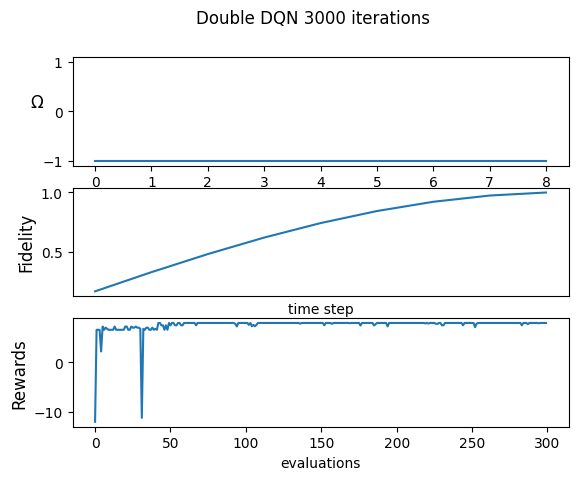

In [6]:
greedy_actions, optimal_omegas, states, fidelities = extract_policy(actions, agent)

time_span = np.arange(len(optimal_omegas))
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
fig.suptitle(f'Double DQN {nb_iterations} iterations')
ax1.step(time_span, optimal_omegas, where = 'post')
ax1.set_ylabel("Ω", rotation = 0, fontsize = 12)
ax1.set_ylim((-1.1, 1.1))

time_span2 = range(len(fidelities))
ax2.plot(time_span2, fidelities)
ax2.set_ylabel("Fidelity", rotation = 90, fontsize = 12)
ax2.set_xlabel(f"time step")
ax2.tick_params(left = True, right = False , labelleft = True, labelbottom = False, bottom = False) 

time_span3 = range(len(avg_returns))
ax3.plot(time_span3, avg_returns)
ax3.set_ylabel("Rewards", rotation = 90, fontsize = 12)
ax3.set_xlabel(f"evaluations")
plt.show()